# Heart Disease Risk Prediction: Logistic Regression Homework
### Author : Roger Rodriguez
----
## Installimg dependencies 

We install the necessary libraries for the development of this laboratory and also import them for your use.


In [4]:
%pip install numpy pandas matplotlib

import numpy as np      
import pandas as pd
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


### Step 1 - Load and Prepare the Dataset

We download from the DataSet which is hosted on Kagglees to access the heart disease dataset.
Using Pandas we visualize the content of the dataset:

In [79]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
print(df.columns)
df.head(15)

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='str')


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


We binarize the target column as 1=disease presence, 0=absence:

In [80]:
df["Heart Disease"] = df["Heart Disease"].map({"Absence": 0, "Presence": 1})
df.head(15)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,1
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,1


### EDA (Exploratory Data Analisys)

We can get a concise and descriptive summary to know more information about of the dataset using 'info()'function and in addition, with the 'describe()' function we obtain basic statistics such as standard deviation, minimums and maximums, means and percentiles. 

In [81]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


On the other hand we can see if there are missing values ​​in the dataset using 'df.isnull().sum()'

In [35]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

The function show us that the dataset is not any missing value , We can also visualize the number of patients suffering from heart disease in a bar chart this to ensure that this is balanced since the logistical regression increases with very unbalanced countries

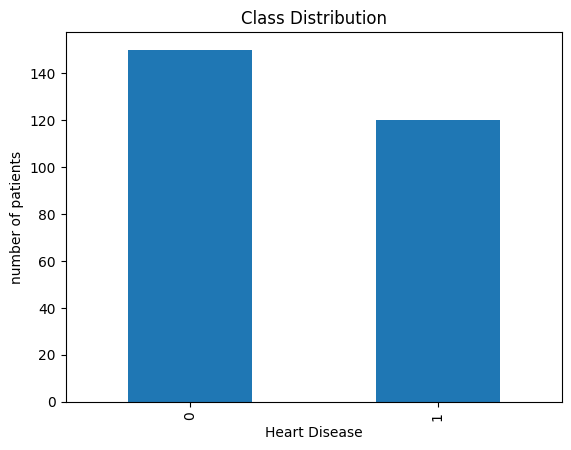

In [82]:
df["Heart Disease"].value_counts().plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("number of patients")
plt.show()


Select 6 variables that were numerical with a direct relationship with cardiac risk, this according to the theory, and they are also not so complex to manage for this exercise (age, cholesterol, blood pressure, maximum heart rate, depression and main vessels)

In [83]:
features = ["Age", "Cholesterol", "BP", "Max HR", "ST depression", "Number of vessels fluro"]
X = df[features].values
y = df["Heart Disease"].values


- Normalization 
  
  Logistic regression needs variables on similar scales so we normalize using the 'mean()' function and we also do the training (70) /test split (30):


In [84]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std
m = len(X)
split = int(0.7 * m)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


### Step 2 -  Logistic Regression 

Using sigmoid function we trasform the any number in a probability between 0-1 

In [85]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Usin a probablity function we have a approximate probability

In [86]:
def predict_probability(X, w, b):
    return sigmoid(X @ w + b)

To know how bad my predictions are and to be able to measure them, we implement the cost function

In [87]:
def cost_function(X, y, w, b):
    m = len(y)
    y_hat = predict_probability(X, w, b)
    return -(1/m) * np.sum(
        y * np.log(y_hat + 1e-8) +
        (1 - y) * np.log(1 - y_hat + 1e-8)
    )


In order to improve our model we implement gradients to indicate possible adjustments

In [88]:
def compute_gradients(X, y, w, b):
    m = len(y)
    y_hat = predict_probability(X, w, b)

    dw = (1/m) * (X.T @ (y_hat - y))
    db = (1/m) * np.sum(y_hat - y)

    return dw, db


Finally, for this part, using the gradient descent we adjust the weights little by little, minimizing the cost function:

In [89]:
def gradient_descent(X, y, lr=0.01, iterations=1000):
    w = np.zeros(X.shape[1])
    b = 0
    costs = []

    for i in range(iterations):
        dw, db = compute_gradients(X, y, w, b)
        w -= lr * dw
        b -= lr * db
        costs.append(cost_function(X, y, w, b))

    return w, b, costs


**Training and Convergency**

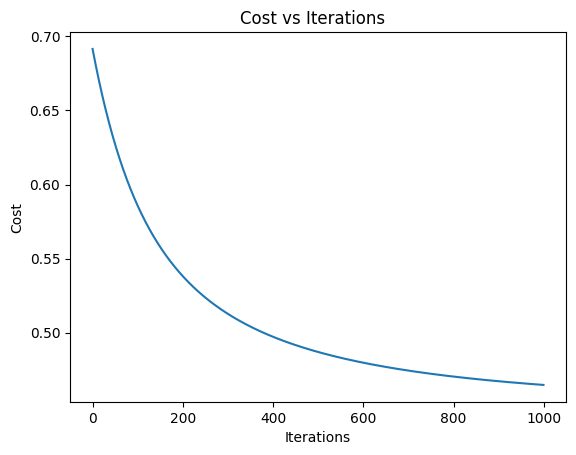

In [92]:
w, b, costs = gradient_descent(X_train, y_train)
plt.plot(costs)
plt.title("Cost vs Iterations  ")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()



we predict with 0.5 threshold

In [93]:
def predict(X, w, b, threshold=0.5):
    probs = predict_probability(X, w, b)
    return (probs >= threshold).astype(int)


**Metrics**

- Accuracy : what percentage was correct
- Accuracy : how reliable the positives are
- Remember : how many patients were detected
- F1 : balance between precision and recall

In [ ]:
def metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp + 1e-8)
    recall = tp / (tp + fn + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)

    return accuracy, precision, recall, f1

y_pred_train = predict(X_train, w, b)
y_pred_test = predict(X_test, w, b)

accuracy, precision, recall, f1 = metrics(y_test, y_pred_test)
print(f"Test Set Metrics:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}")


Test Set Metrics:
Accuracy: 0.7901
Precision: 0.8462
Recall: 0.6286
F1 Score: 0.7213



### Step 3: Visualize Decision Boundaries

we select 3 or more pairs of features

**Age vs Choresterol**


In [96]:
features = ["Age", "Cholesterol"]
X_pair = df[features].values
y_pair = df["Heart Disease"].values


we training 2D Model

In [100]:
w2, b2, _ = gradient_descent(X_pair, y_pair)


we graph

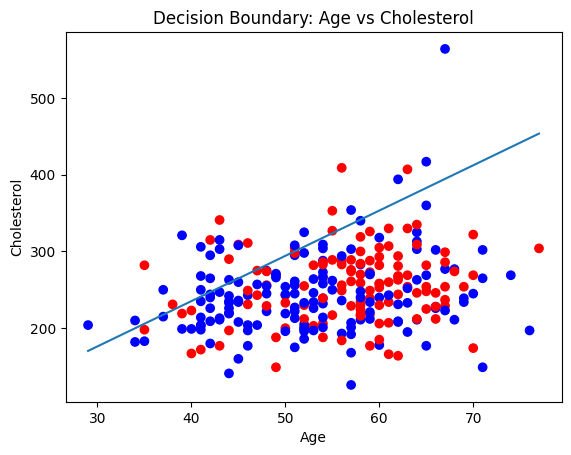

In [98]:
plt.scatter(X_pair[:,0], X_pair[:,1], c=y_pair, cmap='bwr')

x_vals = np.array([X_pair[:,0].min(), X_pair[:,0].max()])
y_vals = -(w2[0]*x_vals + b2) / w2[1]

plt.plot(x_vals, y_vals)
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("Decision Boundary: Age vs Cholesterol")
plt.show()


**Age vs Depression**

In [99]:
features = ["Age", "ST depression"]
X_pair = df[features].values
y_pair = df["Heart Disease"].values

we training 2D Model

In [101]:
w2, b2, _ = gradient_descent(X_pair, y_pair)


we graph

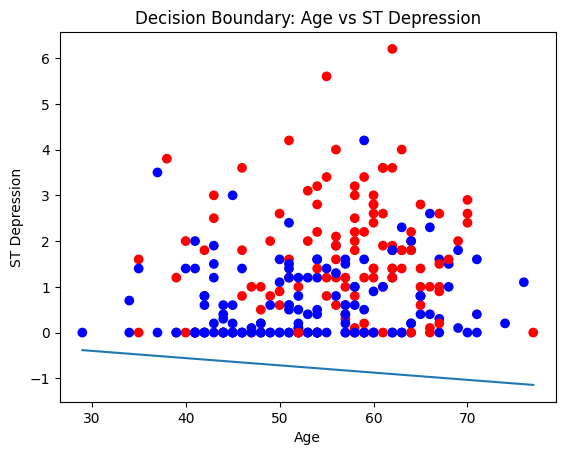

In [103]:
plt.scatter(X_pair[:,0], X_pair[:,1], c=y_pair, cmap='bwr')

x_vals = np.array([X_pair[:,0].min(), X_pair[:,0].max()])
y_vals = -(w2[0]*x_vals + b2) / w2[1]

plt.plot(x_vals, y_vals)
plt.xlabel("Age")
plt.ylabel("ST Depression")
plt.title("Decision Boundary: Age vs ST Depression")
plt.show()

**Age vs Max Heart Rate**

In [105]:
features = ["Age", "Max HR"]
X_pair = df[features].values
y_pair = df["Heart Disease"].values

we training 2D Model

In [106]:
w2, b2, _ = gradient_descent(X_pair, y_pair)

we graph

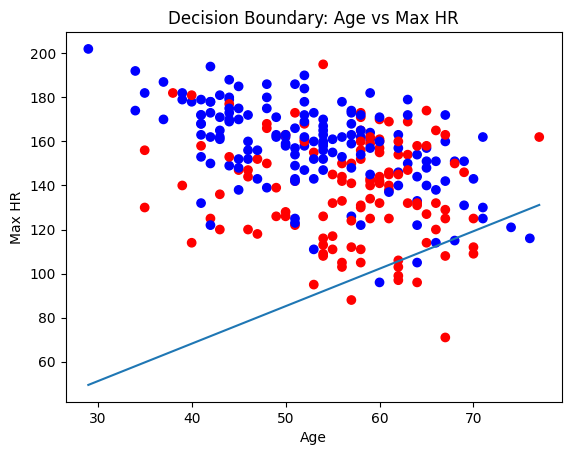

In [107]:
plt.scatter(X_pair[:,0], X_pair[:,1], c=y_pair, cmap='bwr')

x_vals = np.array([X_pair[:,0].min(), X_pair[:,0].max()])
y_vals = -(w2[0]*x_vals + b2) / w2[1]

plt.plot(x_vals, y_vals)
plt.xlabel("Age")
plt.ylabel("Max HR")
plt.title("Decision Boundary: Age vs Max HR")
plt.show()

**Max Heart Rate vs Choresterol**

In [108]:
features = ["Cholesterol", "Max HR"]
X_pair = df[features].values
y_pair = df["Heart Disease"].values

we training 2D Model

In [109]:
w2, b2, _ = gradient_descent(X_pair, y_pair)

C:\Users\Admin\AppData\Local\Temp\ipykernel_26296\3196251242.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


we graph

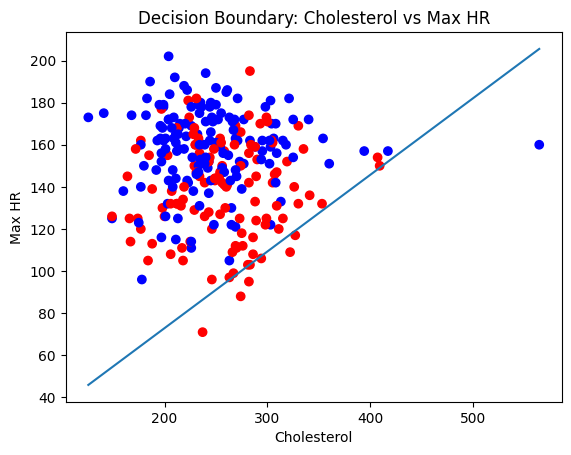

In [111]:
plt.scatter(X_pair[:,0], X_pair[:,1], c=y_pair, cmap='bwr')

x_vals = np.array([X_pair[:,0].min(), X_pair[:,0].max()])
y_vals = -(w2[0]*x_vals + b2) / w2[1]

plt.plot(x_vals, y_vals)
plt.xlabel("Cholesterol")
plt.ylabel("Max HR")
plt.title("Decision Boundary: Cholesterol vs Max HR")
plt.show()

In the 4 cases a partial separation is observed, indicating a non-linear relationship between the variables. 
----
### Step 4: Repeat with Regularization

L2 regularization was incorporated to reduce overfitting by penalizing large weights. Different values ​​of λ were evaluated and it was observed that intermediate values ​​(λ=0.01) achieve the best balance between performance and stability. The norm of the weights decreased and the decision boundaries were smoothed, improving generalization on the test set.

**Cost L2 function**

In [112]:
def cost_l2(X, y, w, b, lam):
    m = len(y)
    base_cost = cost_function(X, y, w, b)
    reg = (lam / (2*m)) * np.sum(w**2)
    return base_cost + reg


**Gradients L2 Function**

In [113]:
def gradients_l2(X, y, w, b, lam):
    m = len(y)
    h = predict_probability(X, w, b)

    dw = (1/m) * np.dot(X.T, (h - y)) + (lam/m) * w
    db = (1/m) * np.sum(h - y)

    return dw, db


we tried different alphas